In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import norm

In [ ]:
df = pd.read_excel('/EDA DATA.xlsx')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

In [ ]:
# head() method displays the top 5 rows in the data set
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [ ]:
# tail() method displays the bottom 5 rows in the data set
df.tail()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
3993,train,47916,280000,2011-10-01,2012-10-01 00:00:00,software engineer,New Delhi,m,1987-04-15,52.09,cbse,2006,55.50,cbse,6268,2,B.Tech/B.E.,information technology,61.50,6268,0,Haryana,2010,365,334,475,0.276047,345,-1,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,train,752781,100000,2013-07-01,2013-07-01 00:00:00,technical writer,Hyderabad,f,1992-08-27,90.00,state board,2009,93.00,state board,4883,2,B.Tech/B.E.,electronics and communication engineering,77.30,4883,1,Telangana,2013,415,410,535,0.881620,325,420,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,train,355888,320000,2013-07-01,present,associate software engineer,Bangalore,m,1991-07-03,81.86,"bse,odisha",2008,65.50,"chse,odisha",9786,2,B.Tech/B.E.,computer engineering,70.00,9786,0,Orissa,2012,475,475,465,0.488348,405,-1,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,train,947111,200000,2014-07-01,2015-01-01 00:00:00,software developer,Asifabadbanglore,f,1992-03-20,78.72,state board,2010,69.88,state board,979,2,B.Tech/B.E.,computer science & engineering,70.42,979,1,Karnataka,2014,450,410,320,0.744758,445,-1,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943
3997,train,324966,400000,2013-02-01,present,senior systems engineer,Chennai,f,1991-02-26,70.60,cbse,2008,68.00,cbse,6609,2,B.Tech/B.E.,information technology,68.00,6609,1,Tamil Nadu,2012,565,515,464,0.600057,435,-1,-1,-1,-1,-1,-1,-1.1128,-0.2793,-0.6343,1.32553,-0.6035


In [ ]:
# shape method is used to know how many rows and columns are there in the data set
print(df.shape)

(3998, 39)


In [ ]:
# describe() method gives basic overview of the statistics.
df.describe()

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,2012.105803,501.649075,501.598799,513.378189,0.510490,353.102801,95.328414,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,31.857271,104.940021,86.783297,122.302332,0.468671,205.355519,158.241218,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,0.000000,180.000000,195.000000,120.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,2012.000000,425.000000,445.000000,430.000000,0.342315,295.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,2013.000000,500.000000,505.000000,515.000000,0.622643,415.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,2014.000000,570.000000,565.000000,595.000000,0.842248,495.000000,233.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,2017.000000,875.000000,795.000000,900.000000,0.999910,840.000000,612.000000,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


# **Analysis of Salary:**

In [107]:
df['Salary'].describe()

count    3.998000e+03
mean     3.076998e+05
std      2.127375e+05
min      3.500000e+04
25%      1.800000e+05
50%      3.000000e+05
75%      3.700000e+05
max      4.000000e+06
Name: Salary, dtype: float64

### **1) KDE plot**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


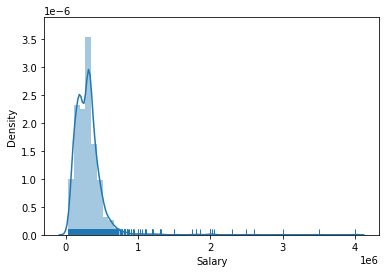

In [ ]:
sns.distplot(df['Salary'],kde=True,rug=True)

## **2) Histogram**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


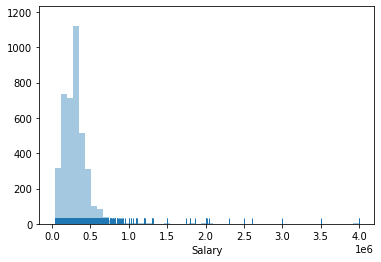

In [ ]:
sns.distplot(df['Salary'], kde=False, rug=True)

In [ ]:
print("salary skewness:",df['Salary'].skew())
print("salary kurtosis:",df['Salary'].kurt())

salary skewness: 6.451081166224832
salary kurtosis: 80.92999627162538


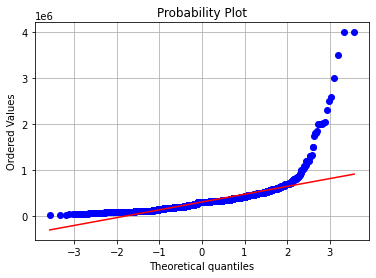

In [ ]:
# Q-Q plot for checking normality

stats.probplot(df['Salary'], dist = "norm", plot = plt)
plt.grid()

In [ ]:
# using box-cox we can transform data to normality

x,l = stats.boxcox(df['Salary'])
print(l)

0.04330214214353366


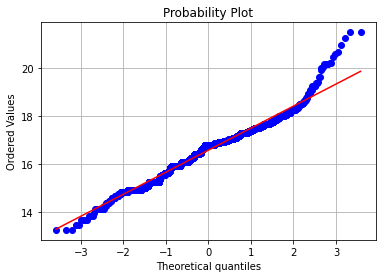

In [ ]:
stats.probplot(x, dist='norm', plot = plt)
plt.grid()

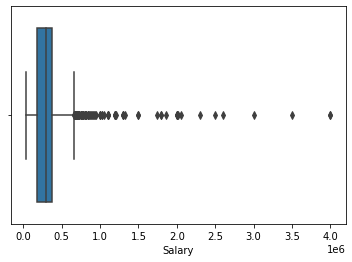

In [ ]:
sns.boxplot(x=df['Salary']) # using boxplot we can find the outlayers

from the above boxplot we can say that salarys above 650000 are outliers

## **Analysis of Designation**

In [ ]:
df['Designation'].describe()

count                  3998
unique                  419
top       software engineer
freq                    539
Name: Designation, dtype: object

## **Univariate analysis**



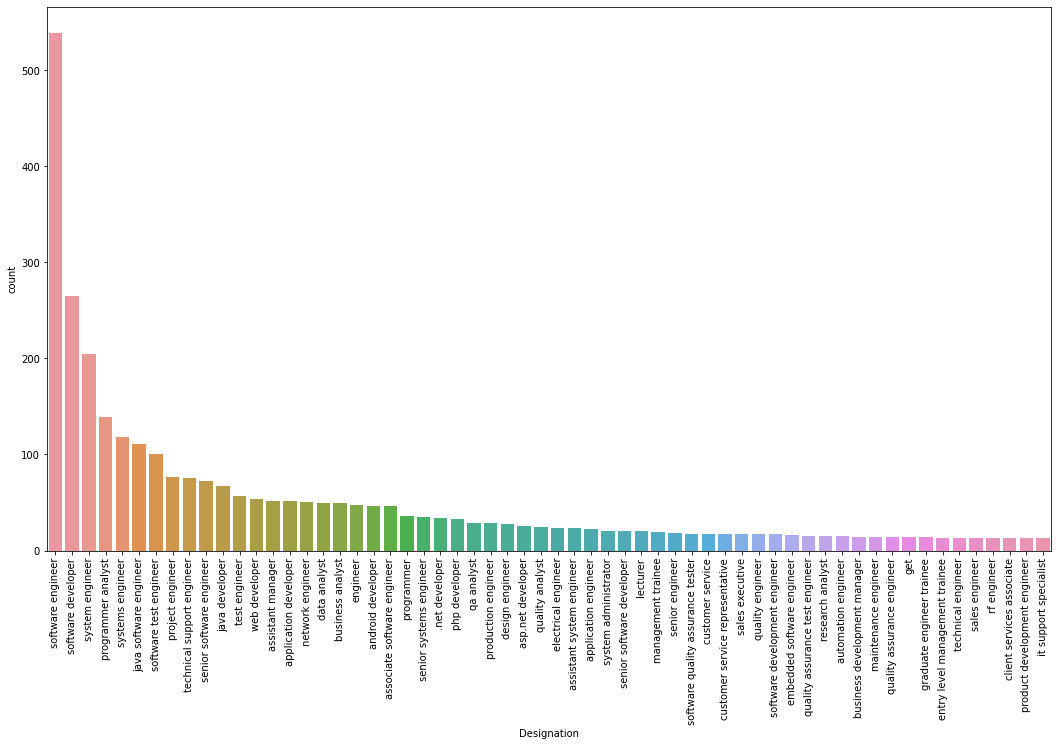

In [ ]:
#Using countplot to see maximum and minimum number of people in a designation

plt.figure(figsize=(18,10))
sns.countplot(x=df["Designation"], order=df["Designation"].value_counts().iloc[:60].index)
plt.xticks(rotation=90)
plt.show()

Here you can clearly see that most of the people are software engineers

## **Bivariate analysis**

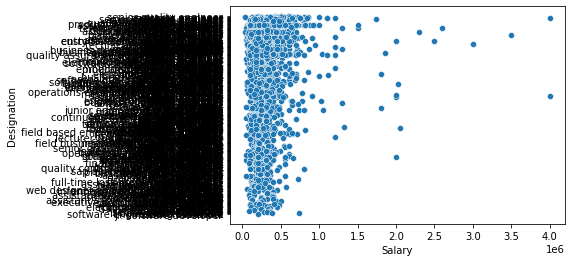

In [ ]:
sns.scatterplot(x=df['Salary'],y=df['Designation'])

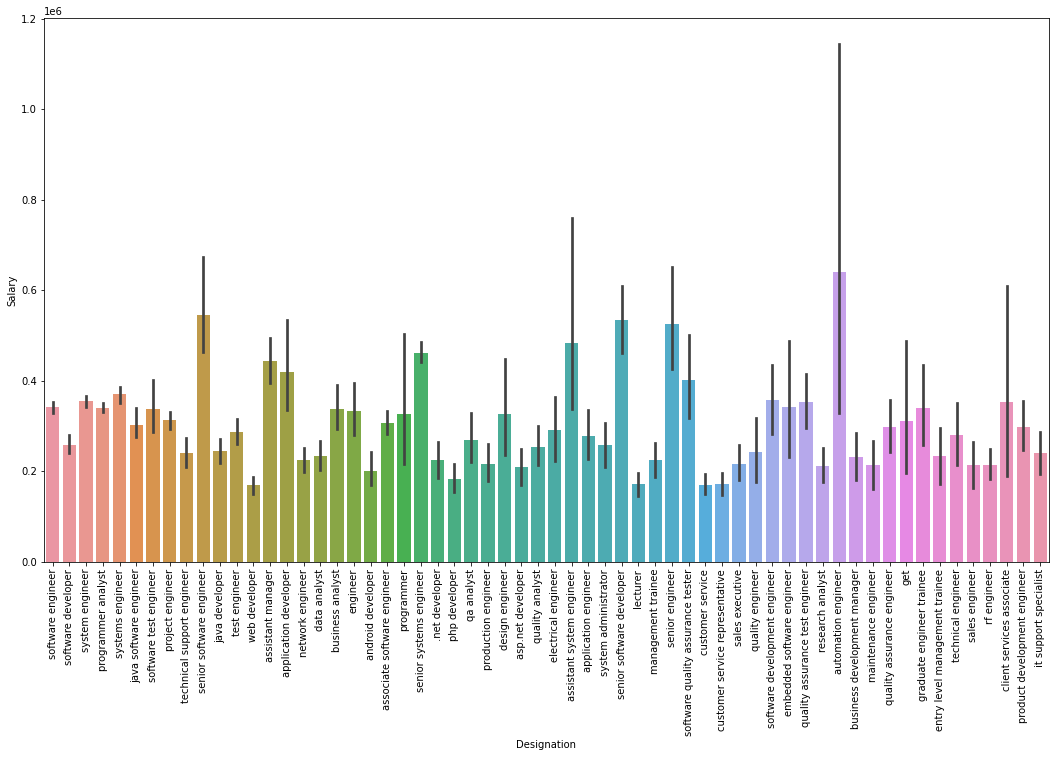

In [ ]:
#barplot between Designation and Salary

plt.figure(figsize=(18,10))
sns.barplot(x=df['Designation'],y=df['Salary'],order=df["Designation"].value_counts().iloc[:60].index)
plt.xticks(rotation=90)
plt.show()


from the above graph maximum salary is earned by automation engineer.

## **Analysis of Job**

In [ ]:
df['JobCity'].describe()

count          3998
unique          339
top       Bangalore
freq            627
Name: JobCity, dtype: object

## **Univariate analysis**

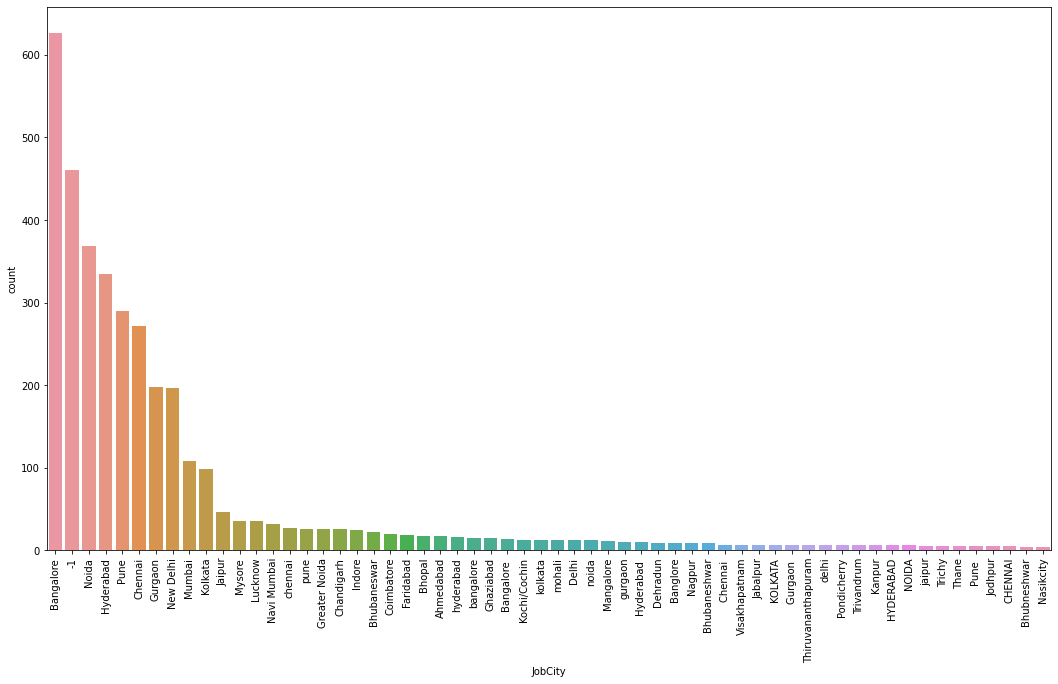

In [ ]:
plt.figure(figsize=(18,10))
sns.countplot(x=df["JobCity"], order=df["JobCity"].value_counts().iloc[:60].index)
plt.xticks(rotation=90)
plt.show()

from the above graph we can say that most of the people are working in bangalore

## **Bivariate analysis**

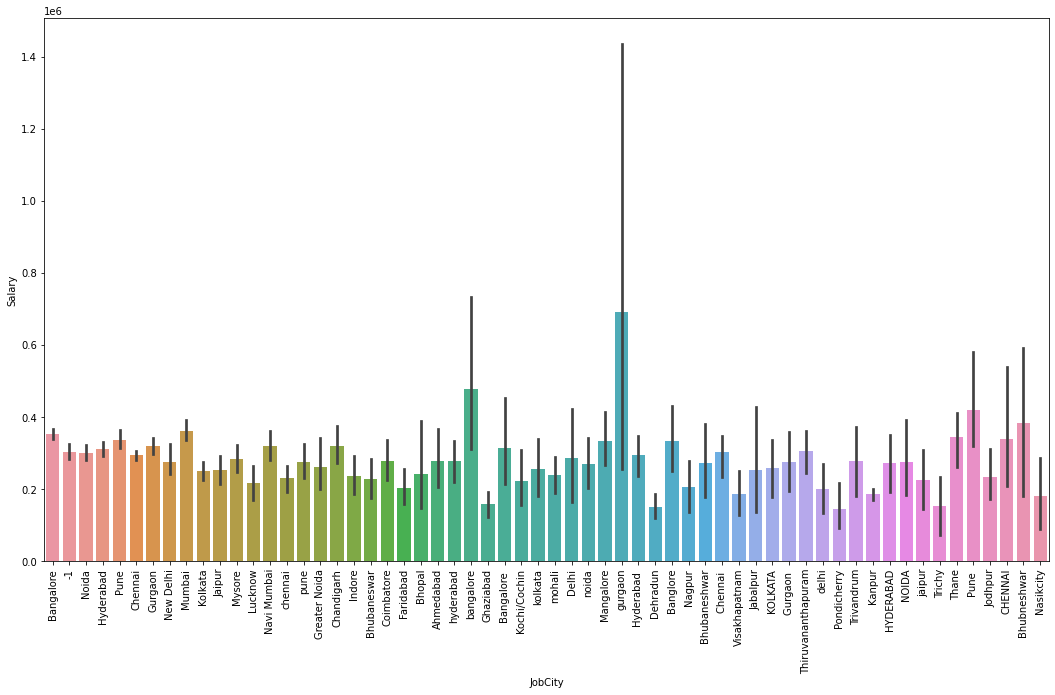

In [ ]:
#Using bar plot to see relation between job city and designation

plt.figure(figsize=(18,10))
sns.barplot(x=df['JobCity'],y=df['Salary'],order=df["JobCity"].value_counts().iloc[:60].index)
plt.xticks(rotation=90)
plt.show()

from the above graph we can say that people working in gurgaon are earning more salary

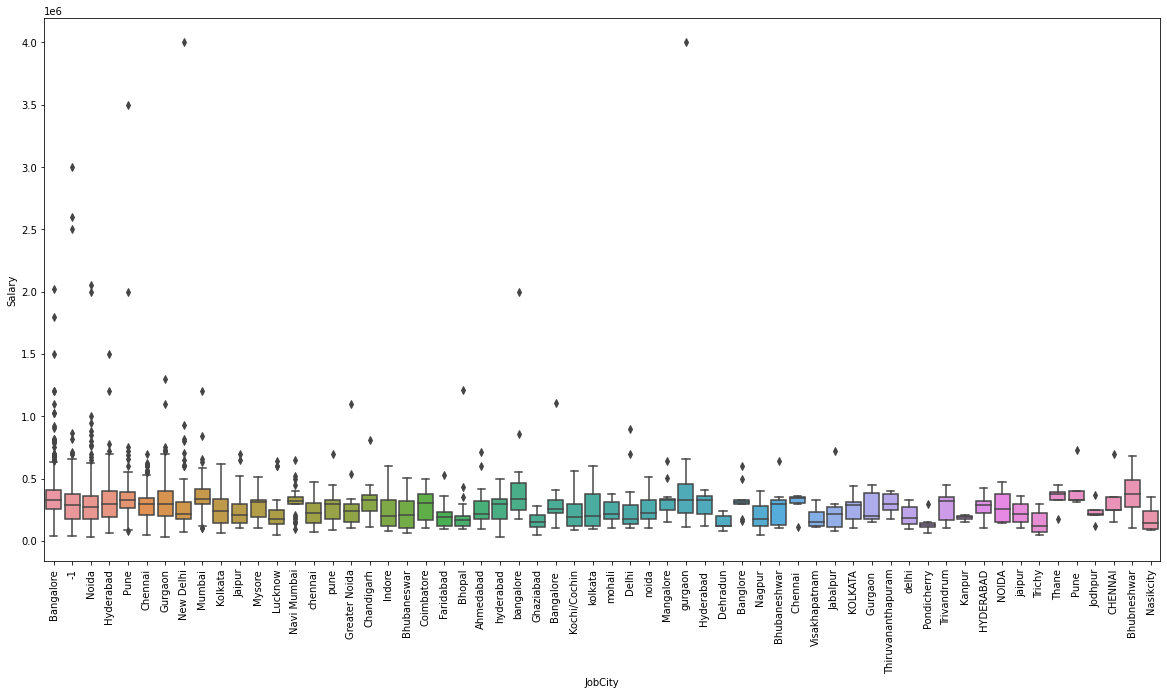

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x=df['JobCity'],y=df['Salary'],order=df['JobCity'].value_counts().iloc[:60].index)
plt.xticks(rotation=90)
plt.show()

from the above boxplot we can say that salary 4000000 giving in delhi and gurgaon are outliers

## **Analysis of Gender**

In [ ]:
#Describing the Gender Column
df['Gender'].describe()

count     3998
unique       2
top          m
freq      3041
Name: Gender, dtype: object

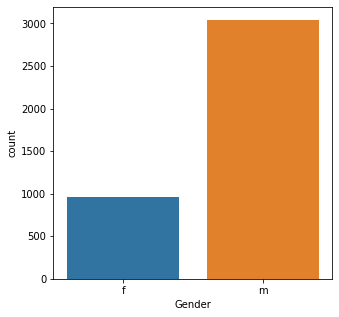

In [ ]:
#ploting countplot to count no. of males and females
plt.figure(figsize=(5,5))
sns.countplot(x=df['Gender'])

## **Bivariate Analysis**

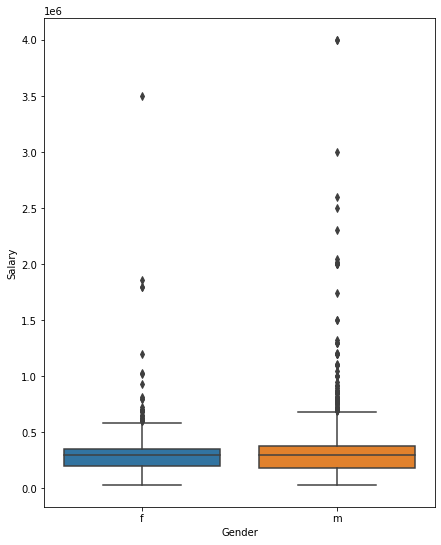

In [ ]:
#Plotting the bxoplot
plt.figure(figsize=(7,9))
sns.boxplot(x=df['Gender'],y=df['Salary'])

from the above boxplot we can say that men are earning more than women

# **Chi Square test for (Gender and Specialization)**

H1: they are dependent(alternate hypothesis)

H0: they are independent(null hypothesis)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import chi2
from scipy.stats import chi2_contingency

In [ ]:
pd.crosstab(df['Specialization'],df['Gender'],margins=True)

Gender,f,m,All
Specialization,,,
aeronautical engineering,1,2,3
applied electronics and instrumentation,2,7,9
automobile/automotive engineering,0,5,5
biomedical engineering,2,0,2
biotechnology,9,6,15
ceramic engineering,0,1,1
chemical engineering,1,8,9
civil engineering,6,23,29
computer and communication engineering,0,1,1


In [ ]:
observed = pd.crosstab(df['Specialization'],df['Gender'])
observed


Gender,f,m
Specialization,,
aeronautical engineering,1,2
applied electronics and instrumentation,2,7
automobile/automotive engineering,0,5
biomedical engineering,2,0
biotechnology,9,6
ceramic engineering,0,1
chemical engineering,1,8
civil engineering,6,23
computer and communication engineering,0,1


In [ ]:
chi2_contingency(observed)

(104.46891913608454,
 1.2453868176977011e-06,
 45,
 array([[7.18109055e-01, 2.28189095e+00],
        [2.15432716e+00, 6.84567284e+00],
        [1.19684842e+00, 3.80315158e+00],
        [4.78739370e-01, 1.52126063e+00],
        [3.59054527e+00, 1.14094547e+01],
        [2.39369685e-01, 7.60630315e-01],
        [2.15432716e+00, 6.84567284e+00],
        [6.94172086e+00, 2.20582791e+01],
        [2.39369685e-01, 7.60630315e-01],
        [5.84062031e+01, 1.85593797e+02],
        [1.43621811e+02, 4.56378189e+02],
        [2.39369685e-01, 7.60630315e-01],
        [4.78739370e-01, 1.52126063e+00],
        [1.78091046e+02, 5.65908954e+02],
        [1.43621811e+00, 4.56378189e+00],
        [2.39369685e-01, 7.60630315e-01],
        [4.78739370e-01, 1.52126063e+00],
        [1.96283142e+01, 6.23716858e+01],
        [2.39369685e-01, 7.60630315e-01],
        [7.65982991e+00, 2.43401701e+01],
        [2.89637319e+01, 9.20362681e+01],
        [2.10645323e+02, 6.69354677e+02],
        [7.18109055e-01, 

In [ ]:

# Computing chi2 test statistic, p-value, degree of freedoms

chi2_test_stat = chi2_contingency(observed)[0]
pval = chi2_contingency(observed)[1]
df = chi2_contingency(observed)[2]

In [ ]:
confidence_level = 0.90

alpha = 1 - confidence_level

chi2_critical = chi2.ppf(1 - alpha, df)

chi2_critical

57.50530474499599

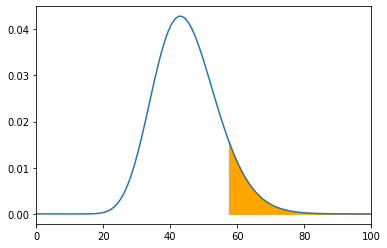

In [ ]:
# Ploting the chi2 distribution to visualise

# Defining the x minimum and x maximum
x_min = 0
x_max = 100

# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = chi2.pdf(x, df)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Setting Chi2 Critical value 
chi2_critical_right = chi2_critical

# Shading the right rejection region
x1 = np.linspace(chi2_critical_right, x_max, 100)
y1 = chi2.pdf(x1, df)
plt.fill_between(x1, y1, color='orange')

In [ ]:
if(chi2_test_stat > chi2_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

Reject Null Hypothesis


In [ ]:
if(pval < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

Reject Null Hypothesis
